In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
import sys
np.set_printoptions(threshold=sys.maxsize)

In [12]:
N =100
dt = 1 
dx = 1
D_u = 0.16
D_v = 0.08
f = 0.035
k = 0.060
w = 1.9

In [8]:
def init(N):
    '''
    Initialize a grid with all zeros
    Args:
        -N the size of the grid
    Out: the initial state of the grid
    '''
    u_grid =  np.full((N,N), 0.5)
    u_grid[0,:] = 0
    u_grid[-1,:] = 0
    u_grid[:,0] = 0
    u_grid[:,-1] = 0
    v_grid = np.zeros((N,N))
    for i in np.arange(int(N/2-5),int(N/2+5),1):
        for j in np.arange(int(N/2-5),int(N/2+5),1):
            v_grid[i,j]=0.25
    return u_grid, v_grid

In [14]:
def GS_model(U, V, D_v, D_u, f, k, w):
    for j in range(1,len(U)-1):
        for i in range(1,len(U)-1):
            u = U[j,i]
            v = V[j,i]
            grad_u = U[j,i] = (1-w)*U[j,i] + (w/4) * (U[j+1,i] + U[j-1,i] + U[j,i+1] + U[j,i-1]) 
            grad_v = V[j,i] = (1-w)*V[j,i] + (w/4) * (V[j+1,i] + V[j-1,i] + V[j,i+1] + V[j,i-1]) 
            U[j,i] = D_u * grad_u - u * v**2 + f * (1-u)
            V[j,i] = D_v * grad_v + u * v**2 - (f+k) * v
    return U,V
            

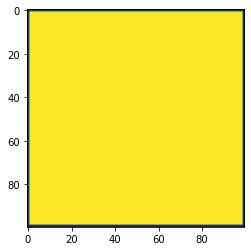

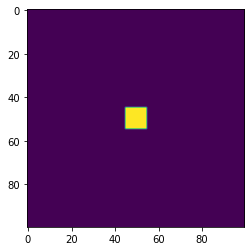

In [15]:
U,V = init(N)

for i in range(1000):
    U,V = GS_model(U, V, D_v, D_u, f, k, w)

plt.imshow(u_grid)
plt.show()
plt.imshow(v_grid)
plt.show()

# fix same scale https://stackoverflow.com/questions/17989917/imshow-subplots-with-the-same-colorbar